In [10]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
%matplotlib inline

In [3]:
#Loading the audio files
classical_music_file = "/content/drive/MyDrive/trytheseaudios/classical.00000.wav"
blues_music_file = "/content/drive/MyDrive/trytheseaudios/blues.00000.wav"
reggae_music_file = "/content/drive/MyDrive/trytheseaudios/reggae.00000.wav"
rock_music_file = "/content/drive/MyDrive/trytheseaudios/rock.00000.wav"
jazz_music_file = "/content/drive/MyDrive/trytheseaudios/jazz.00000.wav"

In [6]:
# load audio files with librosa
classical, sr = librosa.load(classical_music_file)
blues, _ = librosa.load(blues_music_file)
reggae, _ = librosa.load(reggae_music_file)
rock, _ = librosa.load(rock_music_file)
jazz, _ = librosa.load(jazz_music_file)

In [7]:
#Extracting root-mean-squared energy with Librosa

FRAME_SIZE = 1024
HOP_LENGTH = 512

rms_classical = librosa.feature.rms(classical, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_blues = librosa.feature.rms(blues, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_reggae = librosa.feature.rms(reggae, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_rock = librosa.feature.rms(rock, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_jazz = librosa.feature.rms(jazz, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]


In [18]:
#Function for calculating the amplitude envelope
def amplitude_envelope(signal, frame_size, hop_length):
  return np.array([max(signal[i:i+frame_size]) for i in range(0, signal.size, hop_length)])

In [19]:
#Amplitude Envelope for individual genre
ae_classical = amplitude_envelope(classical, FRAME_SIZE, HOP_LENGTH)
ae_blues = amplitude_envelope(blues, FRAME_SIZE, HOP_LENGTH)
ae_reggae = amplitude_envelope(reggae, FRAME_SIZE, HOP_LENGTH)
ae_rock = amplitude_envelope(rock, FRAME_SIZE, HOP_LENGTH)
ae_jazz = amplitude_envelope(jazz,FRAME_SIZE, HOP_LENGTH)

In [9]:
#Visualise RMSE + waveform
frames = range(len(rms_classical))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

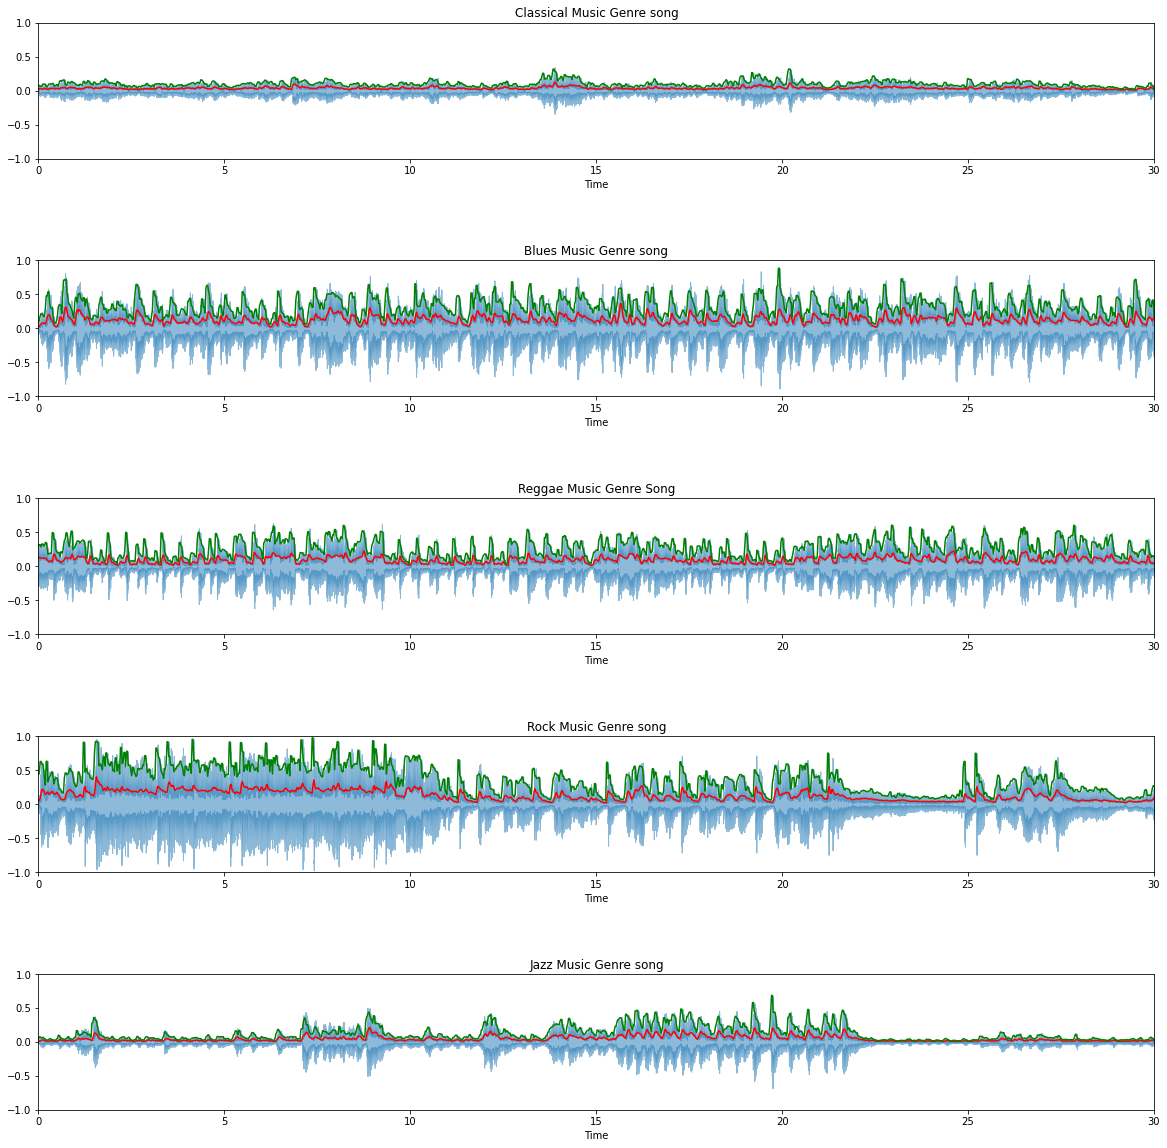

In [28]:
# rms energy is graphed in red

plt.figure(figsize=(20, 20))

ax = plt.subplot(5, 1, 1)
librosa.display.waveplot(classical, alpha=0.5)
plt.plot(t, rms_classical, color="r")
plt.plot(t, ae_classical, color="g")
plt.ylim((-1, 1))
plt.title("Classical Music Genre song")



plt.subplot(5, 1, 2)
librosa.display.waveplot(blues, alpha=0.5)
plt.plot(t, rms_blues, color="r")
plt.plot(t, ae_blues, color="g")
plt.ylim((-1, 1))
plt.title("Blues Music Genre song")

plt.subplot(5, 1, 3)
librosa.display.waveplot(reggae, alpha=0.5)
plt.plot(t, rms_reggae, color="r")
plt.plot(t, ae_reggae, color="g")
plt.ylim((-1, 1))
plt.title("Reggae Music Genre Song")

plt.subplot(5, 1, 4)
librosa.display.waveplot(rock, alpha=0.5)
plt.plot(t, rms_rock, color="r")
plt.plot(t, ae_rock, color="g")
plt.ylim((-1, 1))
plt.title("Rock Music Genre song")

plt.subplot(5, 1, 5)
librosa.display.waveplot(jazz, alpha=0.5)
plt.plot(t, rms_jazz, color="r")
plt.plot(t, ae_jazz, color="g")
plt.ylim((-1, 1))
plt.title("Jazz Music Genre song")


plt.subplots_adjust(hspace = 0.75)
